<a href="https://colab.research.google.com/github/physicsme1729/Numerical-methods-in-physics/blob/main/P346_P745_Class7_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use Richardson's extrapolation to find the derivative of $f(x)=e^{\sin(2x)}$ at $x=0.5$ and find the error for both forward and central difference. Plot the absolute error versus $10^{-8} < h < 10^{0}$.



h abs. err. rich fd abs. err. rich cd
h    abs. err. rich fd    abs. err. rich cd
1e-01 0.02596860598273842413163948 0.00000987283708742126009383
1e-02 0.00026957205000055495247580 0.00000000098986019381186452
1e-03 0.00000270054341822145715923 0.00000000000110977893541531
1e-04 0.00000002701091172951919361 0.00000000000436672920045567
1e-05 0.00000000033891378592443289 0.00000000002805133902938906
1e-06 0.00000000069418515380448298 0.00000000025009594395442036
1e-07 0.00000001002005856065579792 0.00000001070410471371019412


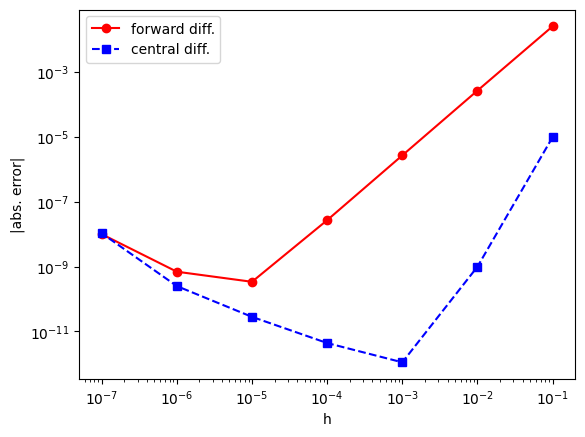

In [ ]:
#with Richardson extrapolation
from math import exp, sin, cos, log10
import matplotlib.pyplot as plt
def f(x):
 return exp(sin(2*x))
def fprime(x):
 return 2*exp(sin(2*x))*cos(2*x)
def difffd(f,x,h):
  fd = (f(x+h) - f(x))/h
  return fd
def diffcd(f,x,h):
  cd = (f(x+h/2) - f(x-h/2))/h
  return cd
def logplot(h,fd,cd):
  plt.xlabel('h')
  plt.ylabel('|abs. error|')
  plt.plot(h,fd,'r-o',label='forward diff.')
  plt.plot(h,cd,'b--s',label='central diff.')
  plt.xscale('log')
  plt.yscale('log')
  plt.legend()
  plt.show()
x = 0.5
an = fprime(x)
hs = [10**(-i) for i in range(1,7)]
rowf = "{0:1.0e} {1:1.16f} {2:1.16f}"
print("h abs. err. rich fd abs. err. rich cd")
hs = [10**(-i) for i in range(1,8)]
rowf = "{0:1.0e} {1:1.26f} {2:1.26f}"
print("h    abs. err. rich fd    abs. err. rich cd")
fds = [abs(2*difffd(f,x,h/2) - difffd(f,x,h)-an) for h in hs]
cds = [abs((4*diffcd(f,x,h/2) - diffcd(f,x,h))/3-an) for h in hs]
for h,fd,cd in zip(hs,fds,cds):
  print(rowf.format(h,fd,cd))
logplot(hs,fds,cds)

Without Richardson extrapolation, using the second forward and second central difference approximation

h    abs. err. rich fd    abs. err. rich cd
1e-01 0.02596860598273398323954098 0.00000987283709363850903173
1e-02 0.00026957205000055495247580 0.00000000098980112994695446
1e-03 0.00000270054341822145715923 0.00000000000140598643838530
1e-04 0.00000002701091172951919361 0.00000000000140554234917545
1e-05 0.00000000033891378592443289 0.00000000007245981592518547
1e-06 0.00000000025009594395442036 0.00000000113827436365454560
1e-07 0.00000001002005856065579792 0.00000001662529403034795905


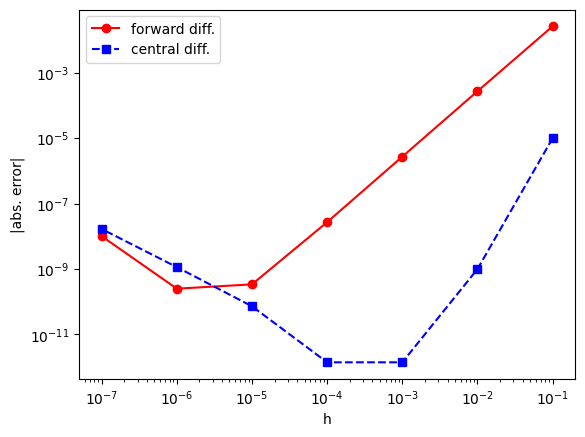

In [ ]:
#without Richardson extrapolation
from math import exp, sin, cos, log10
import matplotlib.pyplot as plt
def f(x):
 return exp(sin(2*x))
def fprime(x):
 return 2*exp(sin(2*x))*cos(2*x)
def difffd(f,x,h):
  fd = (4*f(x+(h/2)) - f(x+h)-3*f(x))/h
  return fd
def diffcd(f,x,h):
  cd = (8*f(x+h/4) + f(x-h/2)-f(x+h/2)-8*f(x-h/4))/(3*h)
  return cd
x = 0.5
fp = fprime(x)
def logplot(h,fd,cd):
    plt.xlabel('h')
    plt.ylabel('|abs. error|')
    plt.plot(h,fd,'r-o',label='forward diff.')
    plt.plot(h,cd,'b--s',label='central diff.')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.show()
hs = [10**(-i) for i in range(1,8)]
rowf = "{0:1.0e} {1:1.26f} {2:1.26f}"
print("h    abs. err. rich fd    abs. err. rich cd")
fds = [abs(difffd(f,x,h)-fp) for h in hs]
cds = [abs(diffcd(f,x,h)-fp) for h in hs]
for h,fd,cd in zip(hs,fds,cds):
  print(rowf.format(h,fd,cd))
logplot(hs,fds,cds)

Use automatic differentiation to calculate derivative of $x^3$ at $x=4$. Use the Python module jax.

In [ ]:
import jax
import jax.numpy as jnp
def f(x):
    return x**3
print(f(4.0))
print(jax.grad(f)(4.0))

64.0
48.0
